In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
files = [file for file in os.listdir('../range_0_1/complex_adaptation_NK') if 'results' in file]

In [3]:
len(files)

30000

In [4]:
ngen_numbers = [100,500,1000,5000,10000,20000,49999]

In [5]:
with open('complex_adaptation_NK/'+files[0], 'rb') as f:
    test = pickle.load(f)

In [6]:
with open('complex_adaptation_NK/'+'paramgrid_complex_adaptation.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [7]:
len(param_grid)

10000

In [8]:
NK_inds = [1,3,5]


99


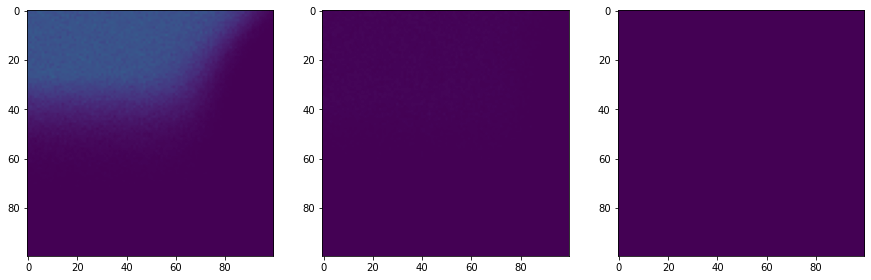

199


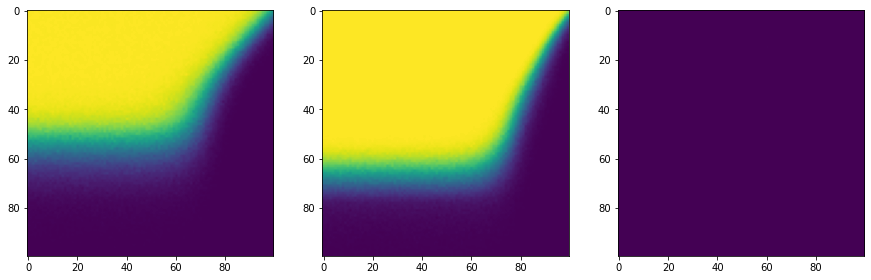

299


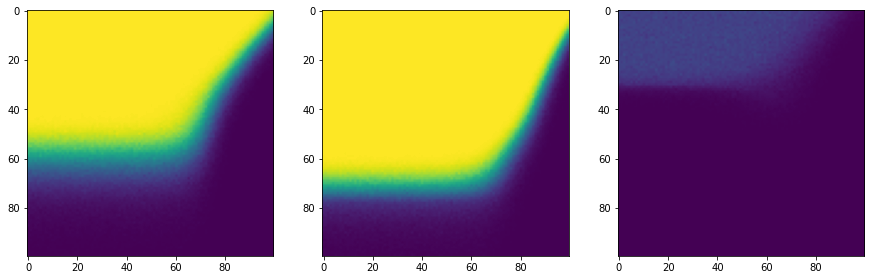

399


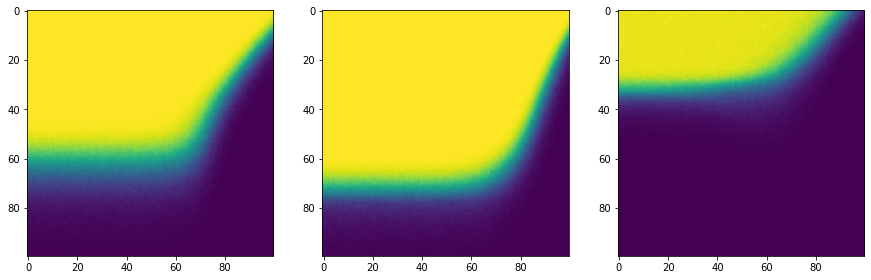

499


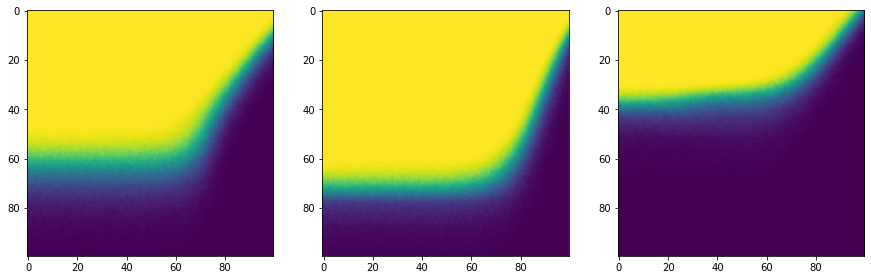

In [9]:
results_all_gen = {}

for ngen in range(99,501,100):
    
    print(ngen)
    
    all_results = [np.zeros((100,100)), np.zeros((100,100)), np.zeros((100,100))]

    for file in files:

        with open('../range_0_1/complex_adaptation_NK/'+file,'rb') as f:
            result = pickle.load(f)

        pind = int(file.split('_')[1].split('_')[-1])
        kind = int(file.split('_')[-1].split('.')[0])

        gamma1, gamma2 = param_grid[pind]['gamma1'], param_grid[pind]['gamma2']

        all_results[NK_inds.index(kind)][99-gamma1, gamma2] = result[ngen]
        

        
    fig, ax = plt.subplots(1,3,figsize = (15,5))
    
    for i in range(3):
        ax[i].imshow(all_results[i], vmin = 0, vmax = 1000)
        
    results_all_gen[ngen] = all_results
        
    plt.show()

In [10]:
ngens = list(results_all_gen.keys())

In [11]:
noise_labels = ['$10^{-6}$', '1.4 $\cdot$ $10^{-5}$', '2.0 $\cdot$ $10^{-4}$', '2.8 $\cdot$ $10^{-3}$', '4.0 $\cdot$ $10^{-2}$', '0.5']

In [12]:
len(noise_labels)

6

In [13]:
list(np.arange(0,100)[::40]) + [99]

[0, 40, 80, 99]

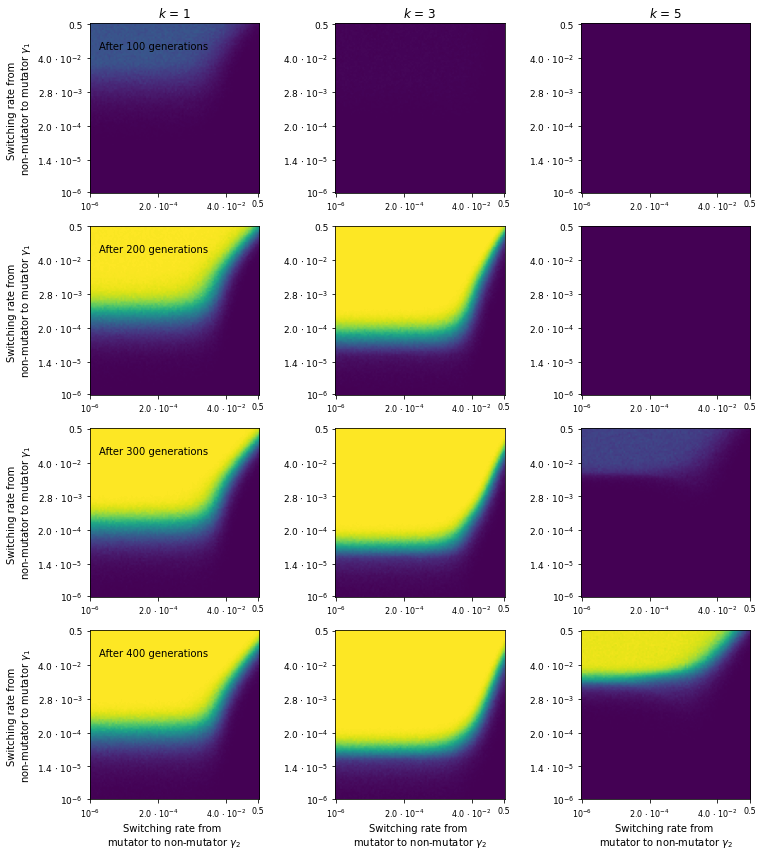

In [19]:
fig, ax = plt.subplots(4,3,figsize = (11,12))

for key in range(4):
    ax[key,0].imshow(results_all_gen[ngens[key]][0], vmin = 0, vmax = 1000)
    ax[key,1].imshow(results_all_gen[ngens[key]][1], vmin = 0, vmax = 1000)
    ax[key,2].imshow(results_all_gen[ngens[key]][2], vmin = 0, vmax = 1000)
    
for i in range(4):
    ax[i,0].text(5,15, 'After ' + str(ngens[i]+1) + ' generations', fontsize = 10)
    ax[i,0].set_ylabel('Switching rate from \nnon-mutator to mutator $\gamma_1$', fontsize = 10)
    for j in range(3):
        ax[3,j].set_xlabel('Switching rate from \nmutator to non-mutator $\gamma_2$', fontsize = 10)
        ax[i,j].set_xticks(list(np.arange(0,100)[::40]) + [99])
        ax[i,j].set_xticklabels(np.array(noise_labels)[[0,2,4,-1]], fontsize = 8)
        ax[i,j].set_yticks(list(np.arange(0,100)[::20]) + [99])
        ax[i,j].set_yticklabels(noise_labels[::-1], fontsize = 9)
        
ax[0,0].set_title('$k$ = 1', fontsize = 12)
ax[0,1].set_title('$k$ = 3', fontsize = 12)
ax[0,2].set_title('$k$ = 5', fontsize = 12)

plt.tight_layout()
plt.savefig('NK_evolution_adaptation_OCT21.jpg', dpi = 600, bbox_inches = 'tight')

In [11]:
with open('NK_complex_adaptation_matrices_0_1.txt', 'wb') as f:
    pickle.dump(results_all_gen, f)